# *`Assignment_7`*

**Problem Statement 1:** Build a text classification RNN ( Recurrent Neural Network) model using IMDB dataset. Import the IMDB dataset using tensorflow_datasets and perform the following tasks.

Tasks to be performed:
1. Import the required libraries
2. Shuffle the data for training and create batches of text and label pairs
3. Encode the text data

**Note:** The simplest way to process text for training is using the
TextVectorization layer.

4. Build a sequential model using tf.keras.Sequential function
5. Compile the model
6. Train the model using train dataset
7. Test the data using tset dataset and evaluate the model by passing a sentence
Note: If the prediction is >= 0.0, it is positive else it is negative.

In [6]:
# Make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

In [5]:
# Import the dataset using the Tensorflow datasets
imdb_dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTXSNYG/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTXSNYG/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTXSNYG/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmp2_otorxgtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [7]:
# Split the dataset into training and testing sets
train_dataset, test_dataset = imdb_dataset['train'], imdb_dataset['test']

In [8]:
# Print an example from the training dataset
for text, label in train_dataset.take(1):
    print(f"Text:\n {np.array(text)}\nLabel:, {np.array(label)}")

Text:
 b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Label:, 0


In [9]:
BATCH_SIZE = 32

# Shuffle and batch the training data
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(BATCH_SIZE)

# Shuffle and batch the testing data
test_dataset = test_dataset.batch(BATCH_SIZE)

In [10]:
# Create a TextVectorization layer to encode the text data
vectorizer = layers.TextVectorization(max_tokens=10000, output_sequence_length=250)
vectorizer.adapt(train_dataset.map(lambda x, y: x))

In [11]:
# Build a sequential model
model = tf.keras.Sequential([
    layers.Input(shape = (1,), dtype = tf.string),
    vectorizer,
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=10)

Epoch 1/10
782/782 [==============================] - 64s 77ms/step - loss: 0.3912 - accuracy: 0.8280
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2210 - accuracy: 0.9142
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.1738 - accuracy: 0.9348
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1407 - accuracy: 0.9501
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1184 - accuracy: 0.9586
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0953 - accuracy: 0.9694
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0800 - accuracy: 0.9752
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 9/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0571 - accuracy: 0.9830
Epoch 10/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0449 - accuracy

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 250)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 250, 64)           640000    
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 644225 (2.46 MB)
Trainable params: 644225 

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.8781 - accuracy: 0.8228
Test Loss: 0.8780919313430786
Test Accuracy: 0.8227999806404114


In [25]:
# Test the model with a sentence
sentence = "This movie was great"
predicted_label = model.predict(tf.expand_dims(sentence, -1))[0][0]
print("Predicted Label:", predicted_label)

1/1 [==============================] - 0s 19ms/step
Predicted Label: 0.9999999


**Problem Statement 2:**
Sumanth wants to build an flowers image classification CNN model which can take a flower image as input and prints the name of flower.

**Dataset Description:** The dataset consist of 3,700 photos of flowers. The dataset contains five sub-directories, one per class:
* daisy
* dandelion
* roses
* sunflowers
* tulips

Tasks to be performed:
1. Import all the required libraries
2. Download the flowers data from URL: 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' using the Keras; and analyzing the images present in the dataset visualization
3. Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio
4. Plot a sample image attributed to each class name present in the original dataset.
5. Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number
6. Build a sequential CNN model
7. Compile the model and print model summary
8. Train and validate the model and plot the validation results using a line plot
9. Feed the system with an image of a flower and print the prediction along with the accuracy

In [1]:
# Get the data
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2024-03-11 09:19:26--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.207, 173.194.215.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   205MB/s    in 1.1s    

2024-03-11 09:19:27 (205 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [2]:
import tarfile

# Replace 'your_file.tgz' with the path to your .tgz file
with tarfile.open('flower_photos.tgz', 'r:gz') as tar:
    tar.extractall()

In [3]:
# Walk through the extracted directory
import os

for dirpath, dirnames, filenames in os.walk('flower_photos'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

There are 5 directories and 1 in flower_photos
There are 0 directories and 633 in flower_photos/daisy
There are 0 directories and 898 in flower_photos/dandelion
There are 0 directories and 799 in flower_photos/tulips
There are 0 directories and 641 in flower_photos/roses
There are 0 directories and 699 in flower_photos/sunflowers


In [4]:
# Fetch the class names from the data
import pathlib

data_dir = 'flower_photos/'

class_dir = pathlib.Path(data_dir)
class_names = sorted([item.name for item in class_dir.glob('*')])
class_names = class_names[1:]
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

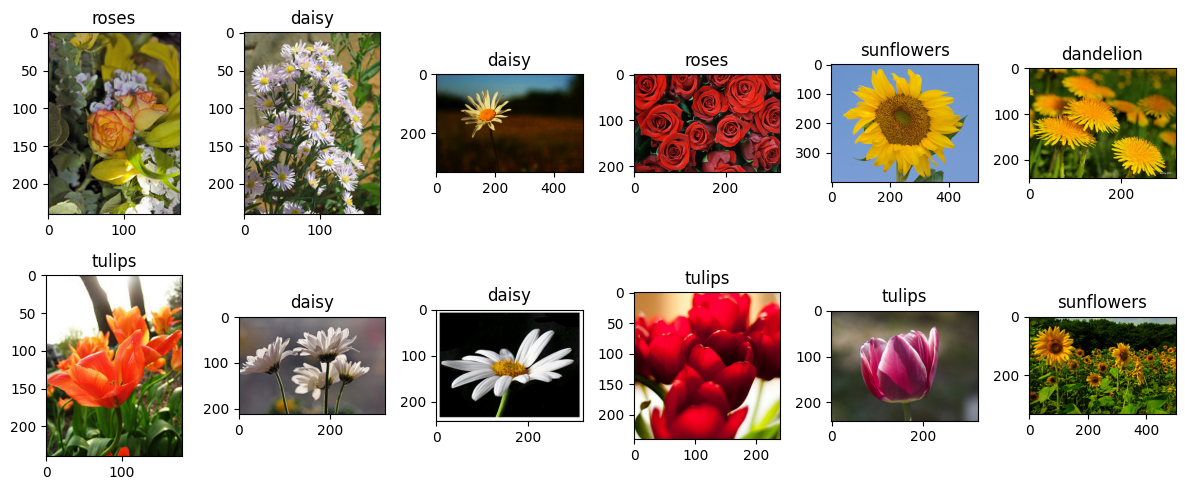

In [7]:
# Lets plot random images from the dataset
import random
import matplotlib.image as mpimg

plt.figure(figsize = (12, 5))
# Plot 12 random images from the data
for i in range(12):
  plt.subplot(2, 6, i + 1)

  # Select a random class from the class names
  random_class = random.choice(class_names)
  target_dir = data_dir + random_class

  # Pick a random image file from the target directory
  random_image = random.sample(os.listdir(target_dir), 1)

  # Read the image and plot it using matplotlib
  image = mpimg.imread(target_dir + '/' + random_image[0])
  plt.imshow(image)
  plt.title(random_class)

plt.tight_layout()
plt.show()

In [11]:
# Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio
IMG_SIZE = (224, 224)
batch_size = 32

# Create training and validation datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                  class_names = class_names,
                                                                  validation_split=0.2,
                                                                  subset="training",
                                                                  seed=42,
                                                                  image_size=IMG_SIZE,
                                                                  batch_size=batch_size)

val_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                class_names = class_names,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=42,
                                                                image_size=IMG_SIZE,
                                                                batch_size=batch_size)

# Autotune and normalize the data
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_data.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:
# Build a sequential CNN model
cnn_model = tf.keras.models.Sequential([
    layers.Rescaling(scale = 1/255., input_shape = (224,224,3)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [29]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 32)       

In [30]:
# Fit the model
history_cnn = cnn_model.fit(train_ds,
                            epochs = 5,
                            steps_per_epoch = len(train_ds),
                            validation_data = val_ds,
                            validation_steps = int(len(val_ds) * 0.15))

Epoch 1/5


KeyboardInterrupt: 

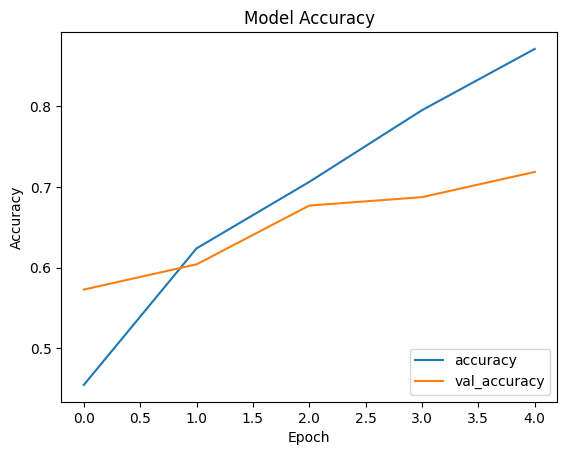

In [16]:
# Plot validation results
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

In [18]:
# Evaluate the model on the test data
cnn_model.evaluate(val_ds)

23/23 [==============================] - 26s 1s/step - loss: 1.0887 - accuracy: 0.6608


[1.0887430906295776, 0.6607629656791687]

In [27]:
from PIL import Image

# Load and preprocess the image
image_path = '/content/asset-767c3c51ac563f0e8786ce6a6abd20bb.png'  # Replace 'path_to_your_image.jpg' with the actual path to your image
image = Image.open(image_path)
image = image.convert('RGB')
image = image.resize((224, 224))  # Resize the image to match the input size of your model
image = np.array(image) / 255.0  # Normalize pixel values to the range [0, 1]

# Make predictions
predictions = cnn_model.predict(np.expand_dims(image, axis=0))

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Get the predicted class name
predicted_class_name = class_names[predicted_class]

# Get the confidence score for the predicted class
confidence_score = predictions[0][predicted_class]

# Print the prediction along with the accuracy
print(f"The predicted class is: {predicted_class_name} with confidence score: {confidence_score:.4f}")


1/1 [==============================] - 0s 82ms/step
The predicted class is: dandelion with confidence score: 0.9981
